In [1]:
# The objective is to do sentiment analysis in which we find the positive and negative comments from the reviewer comments.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('listings_summary.csv')
data.shape

(22552, 96)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [4]:
data_1 = pd.read_csv('reviews_summary.csv')
data_1.shape

(401963, 6)

In [5]:
data_1.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...


In [6]:
# concat data frame data_1 with comments and few columns from data dataframe.
df = pd.merge(data_1, data[['neighbourhood_group_cleansed',
                          'id', 'price', 'accommodates', 'room_type']], 
              left_on='listing_id', right_on='id', how='left')

In [7]:
df.shape

(401963, 11)

In [8]:
df.rename(columns = {'neighbourhood_group_cleansed': 'neighbourhood', 'id_x': 'id'}, inplace =True)
df.drop(['id_y'], axis =1,inplace = True )

In [9]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,price,accommodates,room_type
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,Mitte,$60.00,3,Entire home/apt
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,$60.00,3,Entire home/apt


In [10]:
# clean price column
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

In [11]:
# Treat missing values
df.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         496
neighbourhood      0
price              0
accommodates       0
room_type          0
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
neighbourhood    0
price            0
accommodates     0
room_type        0
dtype: int64

In [14]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,price,accommodates,room_type
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,Mitte,60.0,3,Entire home/apt
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,60.0,3,Entire home/apt


In [15]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,price,accommodates,room_type
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,Mitte,60.0,3,Entire home/apt
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,60.0,3,Entire home/apt


In [16]:
df.shape

(401467, 10)

In [17]:
# Language detection

from langdetect import detect


In [18]:
def language_detection(text):
    try:
        return detect(text)
    except:
        return None


In [19]:
df['language'] = df['comments'].apply(language_detection)

In [20]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,price,accommodates,room_type,language
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,Mitte,60.0,3,Entire home/apt,de
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,60.0,3,Entire home/apt,en


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401467 entries, 0 to 401962
Data columns (total 11 columns):
listing_id       401467 non-null int64
id               401467 non-null int64
date             401467 non-null object
reviewer_id      401467 non-null int64
reviewer_name    401467 non-null object
comments         401467 non-null object
neighbourhood    401467 non-null object
price            401467 non-null float64
accommodates     401467 non-null int64
room_type        401467 non-null object
language         400821 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 36.8+ MB


In [22]:
df1 = df.dropna()

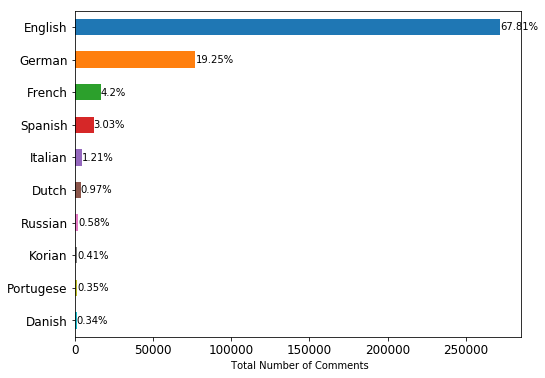

In [23]:
# Find percentage of different languages used by the reviewers. It can be seen that english is the most commonly used language.
df_language = df1.language.value_counts().head(10).plot(kind = 'barh', figsize = (8,6), fontsize = 12)
df_language.set_xlabel(" Total Number of Comments", fontsize=10)
df_language.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch', 'Russian', 'Korian', 'Portugese', 'Danish'])
for i in df_language.patches:
    df_language.text(x=i.get_width(), y=i.get_y()+0.35, 
            s=str(round((i.get_width()/df.language.value_counts().sum())*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
df_language.invert_yaxis()

In [24]:
# import sentiment analyser from nltk library.
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
# create an instance of sentiment analyser.
analyzer = SentimentIntensityAnalyzer()

In [27]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [28]:
# Creating dataframes with top 3 languages i.e.english, german and french.
df1_eng = df1[(df1['language']=='en')]
df1_de  = df1[(df1['language']=='de')]
df1_fr  = df1[(df1['language']=='fr')]

In [29]:
# create columns with negative, positive, neutral and compound sentiments in dataframe with english comments.
df1_eng['negative_sentiments'] = df1_eng['comments'].apply(negative_score)
df1_eng['neutral_sentiments'] = df1_eng['comments'].apply(neutral_score)
df1_eng['positive_sentiments'] = df1_eng['comments'].apply(positive_score)
df1_eng['compound_sentiments'] = df1_eng['comments'].apply(compound_score)


In [30]:
df= df1_eng

Text(0.5,1,'compound sentiments')

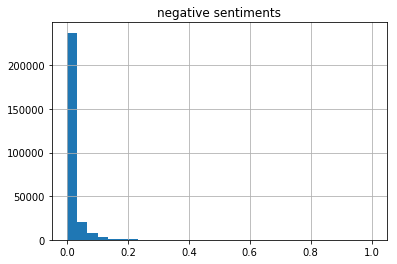

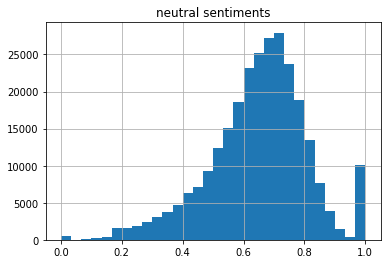

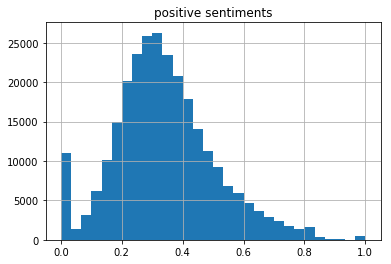

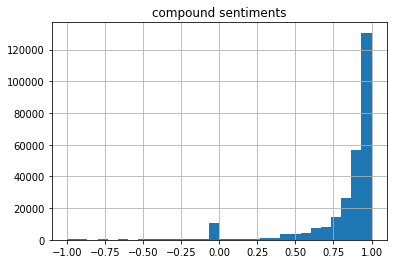

In [31]:
df.hist('negative_sentiments', bins = 30)
plt.title('negative sentiments', loc = 'center')

df.hist('neutral_sentiments', bins = 30)
plt.title('neutral sentiments', loc = 'center')

df.hist('positive_sentiments', bins = 30)
plt.title('positive sentiments', loc = 'center')

df.hist('compound_sentiments', bins = 30)
plt.title('compound sentiments', loc = 'center')


In [32]:
df.shape

(271807, 15)

In [33]:
df['compound_sentiments'].describe()

count    271807.000000
mean          0.831676
std           0.261872
min          -0.996800
25%           0.831300
50%           0.928700
75%           0.966700
max           0.999500
Name: compound_sentiments, dtype: float64

In [34]:
# creating new feature of sentiments_compounds and assign positive, negative , neutral and undefined to the comments.
def sentiments(x):
    if x['compound_sentiments'] > 0.5:
        return 'positive'
    elif x['compound_sentiments'] <0.0:
        return 'negative'
    elif 0.0 < x['compound_sentiments'] < 0.5:
        return 'neutral'
    else:
        return 'Undefined'

In [35]:
df['sentiments_compound'] = df.apply(sentiments, axis = 1)

In [36]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,price,accommodates,room_type,language,negative_sentiments,neutral_sentiments,positive_sentiments,compound_sentiments,sentiments_compound
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,60.0,3,Entire home/apt,en,0.0,0.505,0.495,0.9703,positive
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",Mitte,60.0,3,Entire home/apt,en,0.0,0.530,0.470,0.7955,positive


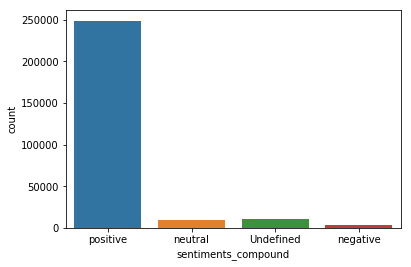

In [37]:
sns.countplot('sentiments_compound',data=df)

In [38]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,price,accommodates,room_type,language,negative_sentiments,neutral_sentiments,positive_sentiments,compound_sentiments,sentiments_compound
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,60.0,3,Entire home/apt,en,0.0,0.505,0.495,0.9703,positive
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",Mitte,60.0,3,Entire home/apt,en,0.0,0.530,0.470,0.7955,positive
6,2015,76603178,2016-05-28,29323516,Laurent,"We had a very nice stay in Berlin, thanks to J...",Mitte,60.0,3,Entire home/apt,en,0.0,0.657,0.343,0.9779,positive
7,2015,77296201,2016-05-31,9025122,Rasmus,"Great location close to Mauerpark, Kastanienal...",Mitte,60.0,3,Entire home/apt,en,0.0,0.727,0.273,0.8353,positive
9,2015,82322683,2016-06-27,73902920,Mag,"Apartment very well located, close to everythi...",Mitte,60.0,3,Entire home/apt,en,0.0,0.811,0.189,0.8439,positive


In [39]:
# Effect of positive sentiments on price.
columns_to_keep = ['listing_id', 'price', 'positive_sentiments']
df_few = df[columns_to_keep].set_index('listing_id')

In [40]:
df_few.head(2)

,price,positive_sentiments
listing_id,,
2015,60.0,0.495
2015,60.0,0.470


In [41]:
df_few_1 = df_few[df_few.positive_sentiments>0.5]
df_few_1.head(2)

,price,positive_sentiments
listing_id,,
2015,60.0,0.657
2015,60.0,0.554


In [42]:
df_few_2 = df_few_1[df_few_1.price < 1000]
df_few_1.head()

,price,positive_sentiments
listing_id,,
2015,60.0,0.657
2015,60.0,0.554
2015,60.0,0.737
2015,60.0,0.538
2015,60.0,0.815


Text(0,0.5,'price')

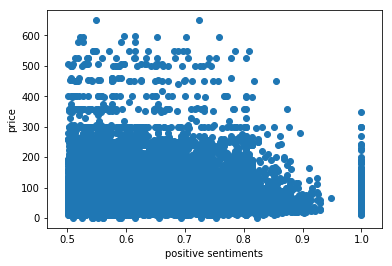

In [43]:
plt.scatter(x = 'positive_sentiments', y = 'price', data = df_few_2)
plt.xlabel('positive sentiments')
plt.ylabel('price')

In [44]:
df_few_2['positive_sentiments'].min()


0.501

In [45]:
def range(x):
    if 0.5 < x <= 0.6:
        return '0.5 to 0.6'
    elif 0.6 < x <= 0.7:
        return '0.6 to 0.7'
    elif 0.7 < x <= 0.8:
        return '0.7 to 0.8'
    else:
        return '0.8 to 1'
    
    

In [46]:
df_few_2['sentiments_1'] = df_few_2['positive_sentiments'].apply(range)

In [47]:
df_few_2.head()

,price,positive_sentiments,sentiments_1
listing_id,,,
2015,60.0,0.657,0.6 to 0.7
2015,60.0,0.554,0.5 to 0.6
2015,60.0,0.737,0.7 to 0.8
2015,60.0,0.538,0.5 to 0.6
2015,60.0,0.815,0.8 to 1


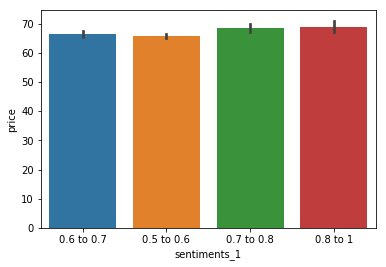

In [48]:
sns.barplot(x = 'sentiments_1', y = 'price', data = df_few_2)

Text(0,0.5,'price')

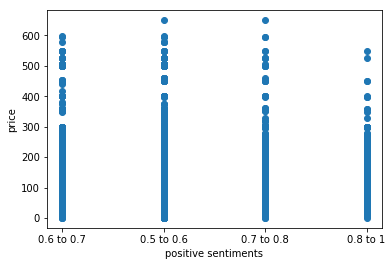

In [49]:
plt.scatter(x = 'sentiments_1', y = 'price', data = df_few_2)
plt.xlabel('positive sentiments')
plt.ylabel('price')

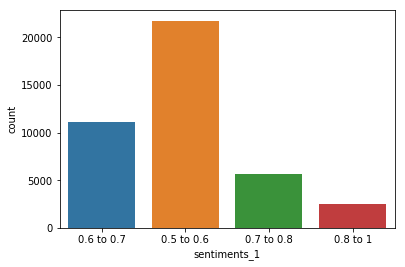

In [50]:
sns.countplot('sentiments_1', data = df_few_2)

In [51]:
# It can be observed from the plots that although the number of positive sentiments in range of 0.5 to 0.6 is the largest, however, with higher value of positive sentiments i.e. 0.7 to 0.8, the price of the property is higher.
# Thus, higher price with highest positive sentiments is in the range of 0.7 to 0.8.
# The higher positive comments is also for range values of 0.5 to 0.6 and it also has the highest price values.
# This could be due to the good quality of property comes under high price range.
# Also, highest positive comments range is 0.8 to 1. However, for this range, the price is bit lower. This may be due to the fact, that in medium price range the person is getting a good quality of property.



In [52]:

#df_1 = df.groupby(['room_type']).sum().stack()
#df_2 = df_1.unstack()
#type(df_2)
#x_list = df_2['compound_sentiments']
#label_list = df_2.index
#plt.axis('equal')

#plt.pie(x_list, labels = label_list, autopct = '%1.1f%%')
#plt.show()

In [53]:
# find positive comments.
df_pos = df.loc[df.compound_sentiments >= 0.95]
pos_comments = df_pos['comments'].tolist()

In [54]:
pos_comments[:5]

['Jan was very friendly and welcoming host! The apartment was great and the area is sooo amazing, lots of nice cafes and shops! Enjoyed my time there a lot!',
 "We had a very nice stay in Berlin, thanks to Jan's premium situated apartment. The place isn't big, but is quiet and functional, also it's situated in a perfect neighbourhood. Jan is a very welcoming host, eager to help you if needed or to provide you any kind of informations. He also has very good advice on biergarten ! ",
 " My staying at Jan's was perfect: the apartment is exactly as described, is located in an amazing area, very easy to reach and close by many restaurants, bars, shops.\r\nJan was very helpful and friendly in giving all kind of tips: how to reach the apartment, good restaurants nearby etc.\r\nSurely I would contact him again for my next stay in Berlin!",
 'very nice apartment, welcoming host, great place, very clean. Thanks Ian!',
 "Great location in Mitte.  Jan's directions were helpful and the flat was eas

In [55]:
type(pos_comments)

list

In [56]:
# find negative comments
df_neg = df.loc[df.compound_sentiments < 0]
neg_comments = df_neg['comments'].tolist()

In [57]:
neg_comments[:5]

['Great Situation;  Room pleasant and clean, and had a spare bed which was appreciated as we were two sisters travelling together.\r\nNo key to room provided so not exactly private!\r\nNo kitchen facility but a kettle was provided.  It would be a small gesture if he had provided a coffee plunger as we had to go out and buy one while there.\r\nOn second day bathroom plug disappeared, so we tried to contact Host, but he did not answer his door.  So we wrote a note asking where it had gone. Next day a curt note appeared on bathroom door about water usage! Tried again to contact him but no answer.  Horwever he knocked on door when either of us were in bathroom next day.  \r\nNot impressed by his lack of courtesy, and we managed to improvise and have our puddle baths despite his harassment.\r\nIn my experience many people use more water with long showers.\r\n than I  do with shallow puddle bath.\r\nWe both felt a discomfort in a house where he just was not prepared to interact with us and w

In [58]:
# find the lenght of positive and negative comments.
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

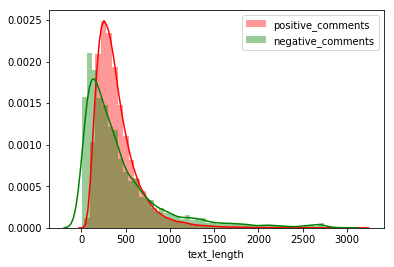

In [59]:
# it can be observed from the graph that the length of positive comments is larger than the negative comments.
sns.distplot(df_pos['text_length'], kde=True, bins=50, color='red')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='green')
plt.legend(['positive_comments', 'negative_comments'])

In [60]:
(df['sentiments_compound']== 'positive').sum()

248729

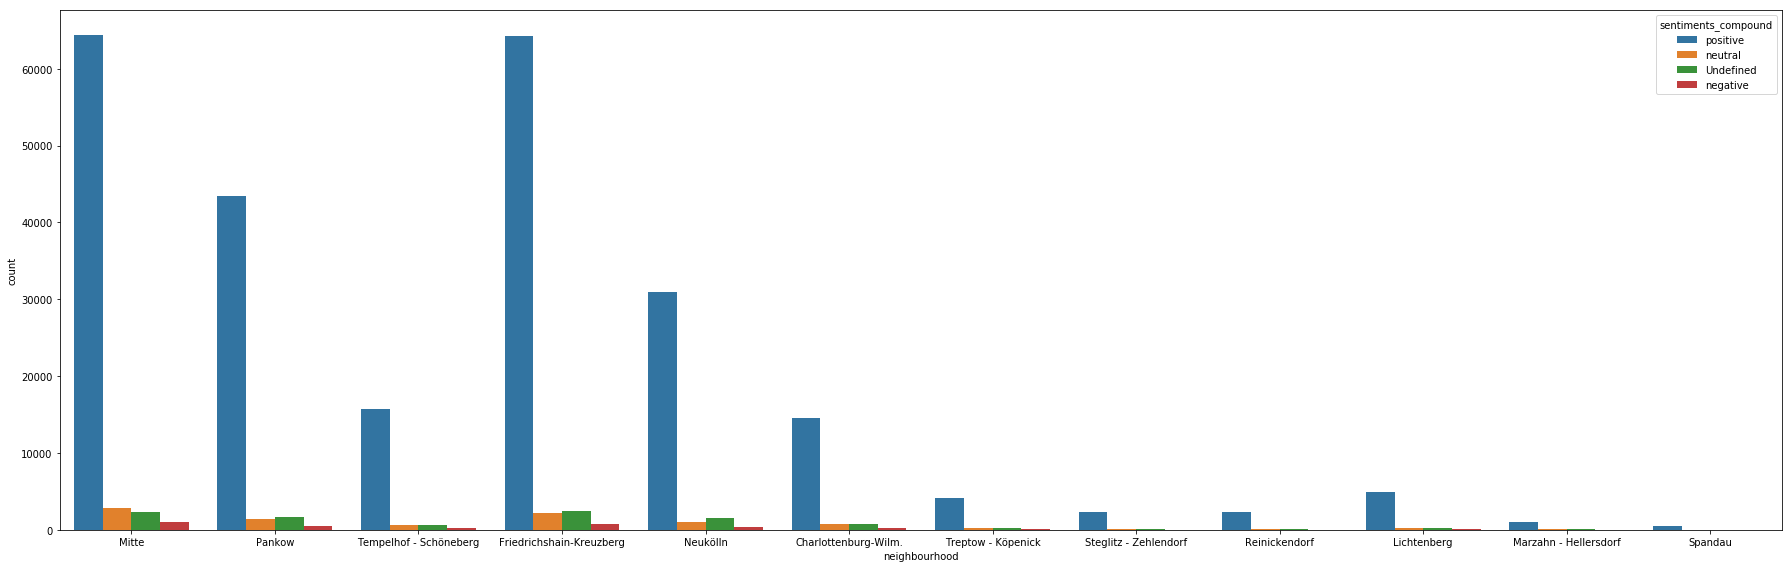

In [61]:
# Plot positive comments with respect to neighbourhood and it can be observed that Mitte and Friedrichshain-kreuzberg has highest number of comments
# Positive comments is higher in all the neighbourhoods.
plt.figure(figsize = (25, 8))
sns.countplot(x = 'neighbourhood', hue = 'sentiments_compound', data = df)
plt.tight_layout()

In [62]:
from nltk.corpus import stopwords

In [63]:
from nltk.stem.wordnet import WordNetLemmatizer
import string


In [98]:
stop = set(stopwords.words("english"))
stop.update(('and','u','I','A','And','So','arnt','didn', 'This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()



In [99]:
stop

{'A',
 'And',
 'I',
 'It',
 'Many',
 'No',
 'So',
 'These',
 'This',
 'When',
 'Yes',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'arnt',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cant',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'many',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'o

In [116]:
# remove stopwords, punctuation and lemmatize the words in comments.
def clean(doc):
    stop_free = ' '.join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join([token for token in stop_free if token not in exclude])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [120]:
# create list of words in positive comments.
doc_clean = [clean(comments).split() for comments in pos_comments]

In [121]:
doc_clean

[['jan',
  'friendly',
  'welcoming',
  'host',
  'apartment',
  'great',
  'area',
  'sooo',
  'amazing',
  'lot',
  'nice',
  'cafe',
  'shop',
  'enjoyed',
  'time',
  'lot'],
 ['nice',
  'stay',
  'berlin',
  'thanks',
  'jan',
  'premium',
  'situated',
  'apartment',
  'place',
  'big',
  'quiet',
  'functional',
  'also',
  'situated',
  'perfect',
  'neighbourhood',
  'jan',
  'welcoming',
  'host',
  'eager',
  'help',
  'needed',
  'provide',
  'kind',
  'information',
  'also',
  'good',
  'advice',
  'biergarten'],
 ['staying',
  'jan',
  'perfect',
  'apartment',
  'exactly',
  'described',
  'located',
  'amazing',
  'area',
  'easy',
  'reach',
  'close',
  'restaurant',
  'bar',
  'shop',
  'jan',
  'helpful',
  'friendly',
  'giving',
  'kind',
  'tip',
  'reach',
  'apartment',
  'good',
  'restaurant',
  'nearby',
  'etc',
  'surely',
  'would',
  'contact',
  'next',
  'stay',
  'berlin'],
 ['nice',
  'apartment',
  'welcoming',
  'host',
  'great',
  'place',
  'cl

In [122]:
import wordcloud
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [123]:
wordcloud = WordCloud(max_words = 300).generate(str(df.comments.values))


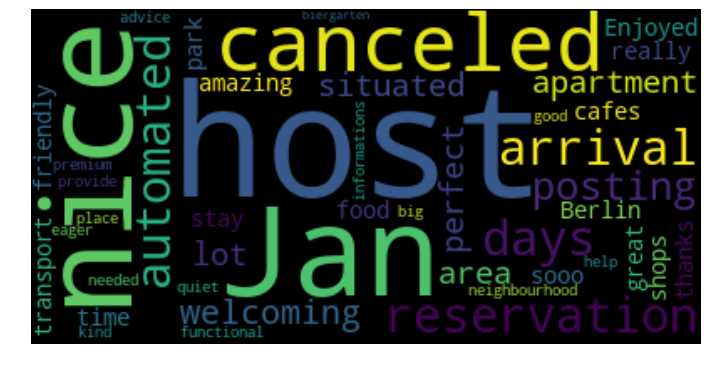

In [124]:
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

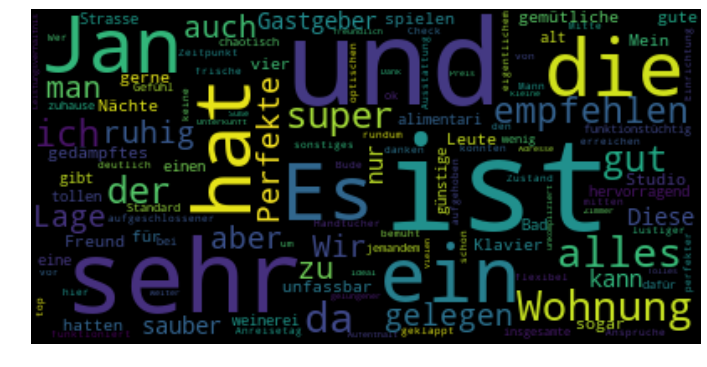

In [125]:
wordcloud = WordCloud(max_words = 300).generate(str(df1_de.comments.values))
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

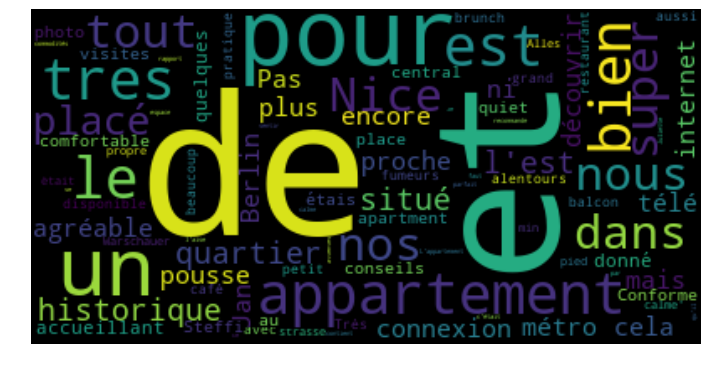

In [126]:
wordcloud = WordCloud(max_words = 300).generate(str(df1_fr.comments.values))
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

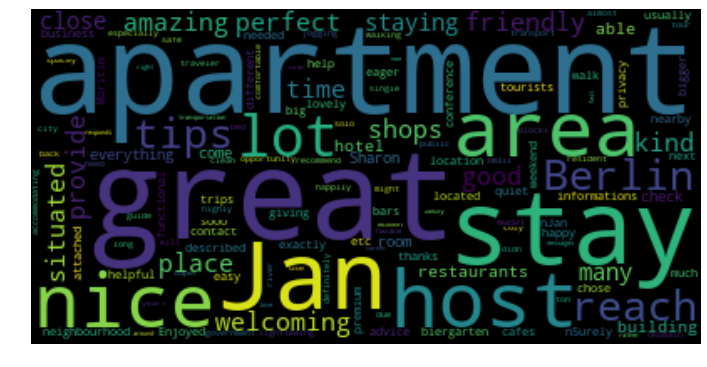

In [127]:
wordcloud = WordCloud(max_words = 300).generate(str(df_pos.comments.values))
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

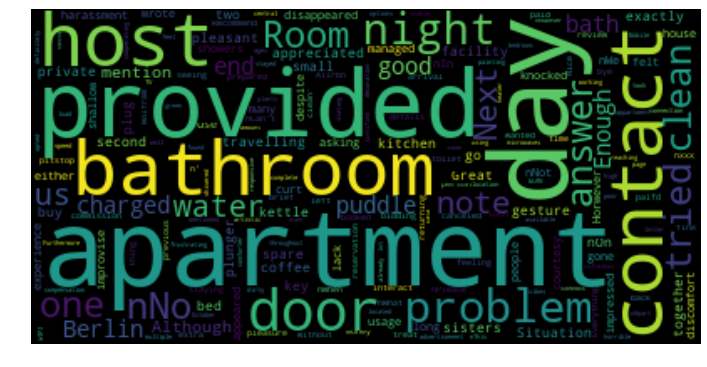

In [128]:
wordcloud = WordCloud(max_words = 300).generate(str(df_neg.comments.values))
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer


In [130]:
vectorizer = CountVectorizer(stop_words = 'english')

In [131]:
freq_positive_comments = vectorizer.fit_transform(pos_comments)


In [132]:
features = vectorizer.get_feature_names()

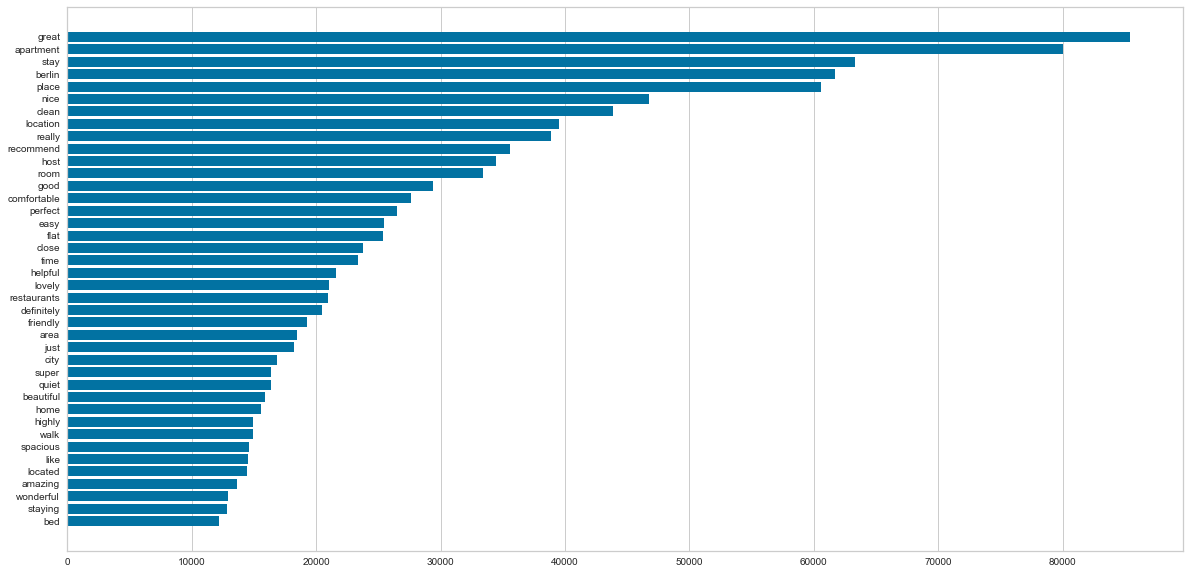

In [133]:
# Top 40 most common used words in positive comments.
plt.figure(figsize = (20, 10))
visualizer = FreqDistVisualizer(features=features, n=40)
visualizer.fit(freq_positive_comments)
visualizer.poof;

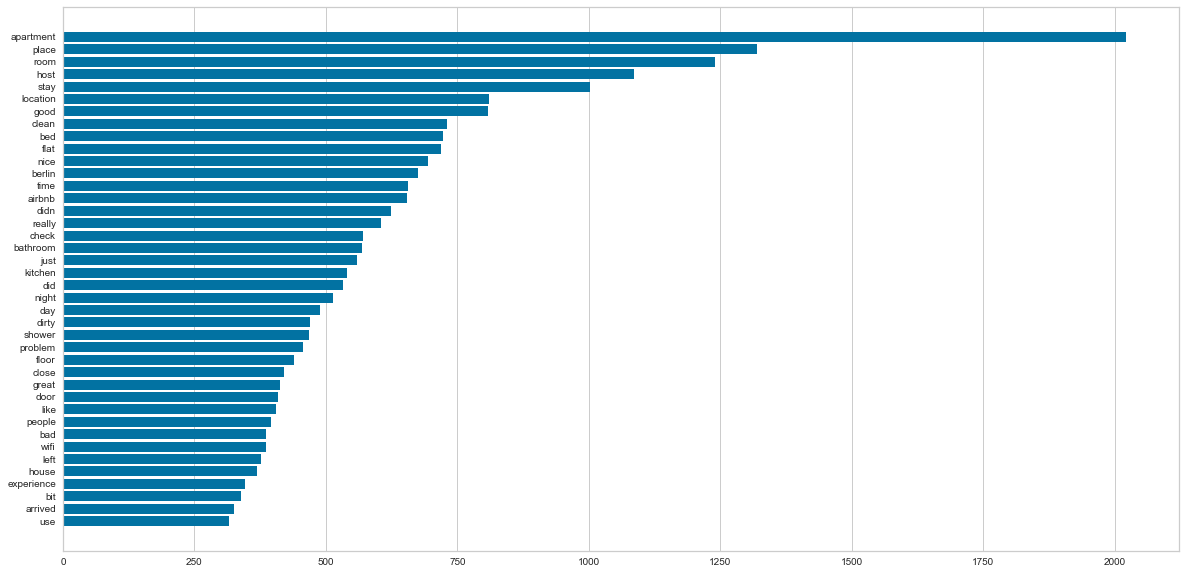

In [134]:
# Top 40 most common used words in negative comments.
freq_negative_comments = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

plt.figure(figsize = (20, 10))
visualizer = FreqDistVisualizer(features=features, n=40)
visualizer.fit(freq_negative_comments)
visualizer.poof;

In [135]:
import gensim

In [136]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [137]:
import pyLDAvis
import pyLDAvis.gensim

In [138]:
id2word = corpora.Dictionary(doc_clean)
corpus = [id2word.doc2bow(text) for text in doc_clean]


In [105]:
id2word[0]

'amazing'

In [139]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, passes = 10)

In [140]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.032*"place" + 0.029*"nice" + 0.026*"really" + 0.021*"room" + 0.019*"host"')
(1, '0.130*"checkin" + 0.114*"value" + 0.059*"money" + 0.043*"checkout" + 0.032*"jan"')
(2, '0.035*"machine" + 0.023*"washing" + 0.023*"alex" + 0.020*"you’re" + 0.016*"michael"')
(3, '0.052*"station" + 0.052*"minute" + 0.042*"walk" + 0.023*"bus" + 0.021*"away"')
(4, '0.028*"room" + 0.026*"kitchen" + 0.026*"bed" + 0.022*"bathroom" + 0.018*"good"')
(5, '0.039*"floor" + 0.020*"high" + 0.020*"building" + 0.016*"window" + 0.016*"stair"')
(6, '0.047*"great" + 0.033*"apartment" + 0.028*"place" + 0.025*"stay" + 0.024*"clean"')
(7, '0.024*"apartment" + 0.024*"restaurant" + 0.020*"great" + 0.017*"berlin" + 0.015*"walking"')
(8, '0.053*"u" + 0.017*"apartment" + 0.016*"even" + 0.013*"berlin" + 0.011*"time"')
(9, '0.057*"great" + 0.049*"stay" + 0.044*"would" + 0.040*"place" + 0.033*"recommend"')


In [141]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.207691 -0.091004       1        1  18.479767
0     -0.196657 -0.012262       2        1  17.422993
8     -0.072114  0.101458       3        1  14.886989
7     -0.108741 -0.004091       4        1  13.491981
9     -0.191545 -0.102710       5        1  12.564725
4     -0.056550  0.146199       6        1  11.208038
3     -0.070804 -0.094496       7        1   6.601556
5      0.203653  0.326036       8        1   2.895750
2      0.321107 -0.054214       9        1   1.554145
1      0.379343 -0.214917      10        1   0.894055, topic_info=      Category          Freq             Term         Total  loglift  logprob
term                                                                         
345    Default  40321.000000                u  40321.000000  30.0000  30.0000
6      Default  88515.000000            great  88515.000000  29.0000  29.0000
95     Default  15766.000000          station  15766.000000  28.0000  28.0000
83     Default  13834.000000           minute  13834.000000  27.0000  27.0000
53     Default  34680.000000            would  34680.000000  26.0000  26.0000
103    Default  15292.000000             walk  15292.000000  25.0000  25.0000
215    Default  21520.000000       definitely  21520.000000  24.0000  24.0000
129    Default  37508.000000        recommend  37508.000000  23.0000  23.0000
49     Default  22044.000000       restaurant  22044.000000  22.0000  22.0000
34     Default  64629.000000             stay  64629.000000  21.0000  21.0000
92     Default  38625.000000             room  38625.000000  20.0000  20.0000
80     Default  11823.000000          kitchen  11823.000000  19.0000  19.0000
7      Default  46982.000000             host  46982.000000  18.0000  18.0000
10     Default  49132.000000             nice  49132.000000  17.0000  17.0000
223    Default   4648.000000          checkin   4648.000000  16.0000  16.0000
1002   Default   9971.000000         bathroom   9971.000000  15.0000  15.0000
145    Default  16362.000000              bed  16362.000000  14.0000  14.0000
37     Default  24960.000000            close  24960.000000  13.0000  13.0000
54     Default  47663.000000            clean  47663.000000  12.0000  12.0000
22     Default  30182.000000             good  30182.000000  11.0000  11.0000
81     Default  42727.000000         location  42727.000000  10.0000  10.0000
270    Default   4080.000000            value   4080.000000   9.0000   9.0000
290    Default  10673.000000            again  10673.000000   8.0000   8.0000
128    Default  11756.000000           public  11756.000000   7.0000   7.0000
143    Default  10345.000000             away  10345.000000   6.0000   6.0000
118    Default  39749.000000           really  39749.000000   5.0000   5.0000
29     Default  79316.000000            place  79316.000000   4.0000   4.0000
131    Default  10291.000000        transport  10291.000000   3.0000   3.0000
980    Default   6446.000000              bus   6446.000000   2.0000   2.0000
599    Default   4573.000000            floor   4573.000000   1.0000   1.0000
...        ...           ...              ...           ...      ...      ...
5200   Topic10    790.155823        christian    791.176331   4.7159  -3.8157
4290   Topic10    707.222717           stefan    708.243225   4.7157  -3.9266
236    Topic10    696.265686         property    697.286255   4.7157  -3.9422
2271   Topic10    602.400879          replied    603.421509   4.7155  -4.0870
13420  Topic10    499.707672            felix    500.728210   4.7151  -4.2739
196    Topic10    480.581696            taken    481.602264   4.7150  -4.3130
1013   Topic10    352.457397        potsdamer    353.477997   4.7143  -4.6230
325    Topic10    340.780396      flexibility    341.800934   4.7142  -4.6567
4288   Topic10    328.748444            peter    329.768982   4.7141  -4.6927
1924   Topic10    515.055237     

In [124]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4840015394565982


In [ ]:
#  Coherence score shows that the model is weak and the plot also shows lots of overlap.
#However still by putting it all together - the WordCloud, the Frequency Distribution and the Topic Modelling-
#Below may be the criteria that make someone rate an apartment positively:

# Cleaned appartment and bathroom, comfortable bed.
#The apartment is quiet to getting sound sleep.
#The area is centrally located with short walking distances, good public transport connections, and has restaurants nearby.

In [142]:
neg_clean = [clean(comment).split() for comment in neg_comments]

In [126]:
neg_clean

[['great',
  'situation',
  'room',
  'pleasant',
  'clean',
  'spare',
  'bed',
  'appreciated',
  'two',
  'sister',
  'travelling',
  'together',
  'key',
  'room',
  'provided',
  'exactly',
  'private',
  'kitchen',
  'facility',
  'kettle',
  'provided',
  'small',
  'gesture',
  'provided',
  'coffee',
  'plunger',
  'go',
  'buy',
  'one',
  'there',
  'second',
  'day',
  'bathroom',
  'plug',
  'disappeared',
  'tried',
  'contact',
  'host',
  'answer',
  'door',
  'wrote',
  'note',
  'asking',
  'gone',
  'next',
  'day',
  'curt',
  'note',
  'appeared',
  'bathroom',
  'door',
  'water',
  'usage',
  'tried',
  'contact',
  'answer',
  'horwever',
  'knocked',
  'door',
  'either',
  'u',
  'bathroom',
  'next',
  'day',
  'impressed',
  'lack',
  'courtesy',
  'managed',
  'improvise',
  'puddle',
  'bath',
  'despite',
  'harassment',
  'experience',
  'many',
  'people',
  'use',
  'water',
  'long',
  'shower',
  'shallow',
  'puddle',
  'bath',
  'felt',
  'discomfo

In [143]:
id2word1 = corpora.Dictionary(neg_clean)
corpus = [id2word1.doc2bow(text) for text in neg_clean]

In [144]:
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word1,
                                            num_topics=10,
                                            passes=10, random_state = 50)

In [145]:
topics1 = lda_model1.print_topics(num_words=5)
for topic in topics1:
    print(topic)

(0, '0.024*"la" + 0.016*"de" + 0.016*"e" + 0.015*"day" + 0.014*"host"')
(1, '0.015*"place" + 0.015*"bed" + 0.012*"room" + 0.011*"apartment" + 0.009*"night"')
(2, '0.041*"war" + 0.025*"und" + 0.019*"die" + 0.019*"alles" + 0.013*"sehr"')
(3, '0.021*"apartment" + 0.019*"room" + 0.014*"close" + 0.014*"location" + 0.012*"good"')
(4, '0.019*"berlin" + 0.019*"place" + 0.018*"stay" + 0.008*"get" + 0.006*"needed"')
(5, '0.010*"everything" + 0.006*"quiet" + 0.005*"good" + 0.005*"apartment" + 0.005*"internet"')
(6, '0.008*"staff" + 0.005*"charged" + 0.004*"stolen" + 0.004*"team" + 0.004*"roomate"')
(7, '0.019*"dirty" + 0.017*"room" + 0.014*"place" + 0.012*"clean" + 0.012*"bed"')
(8, '0.020*"apartment" + 0.011*"u" + 0.010*"would" + 0.009*"airbnb" + 0.008*"place"')
(9, '0.014*"apartment" + 0.013*"host" + 0.011*"u" + 0.009*"place" + 0.009*"stay"')


In [146]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model1, corpus, id2word1)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.197618  0.042962       1        1  43.055737
3     -0.179934 -0.078238       2        1  14.969103
8     -0.139798  0.070103       3        1  14.345744
7     -0.175764  0.009349       4        1  12.852174
1     -0.129411 -0.005590       5        1   7.102346
2      0.172323 -0.169109       6        1   2.151739
0      0.224834  0.167074       7        1   1.866242
5      0.117542 -0.022909       8        1   1.585991
4      0.110108 -0.023965       9        1   1.382698
6      0.197716  0.010324      10        1   0.688218, topic_info=      Category         Freq         Term        Total  loglift  logprob
term                                                                   
264    Default  1364.000000        place  1364.000000  30.0000  30.0000
472    Default   969.000000         stay   969.000000  29.0000  29.0000
19     Default   754.000000          day   754.000000  28.0000  28.0000
94     Default   591.000000       berlin   591.000000  27.0000  27.0000
38     Default  1169.000000         host  1169.000000  26.0000  26.0000
253    Default   447.000000        dirty   447.000000  25.0000  25.0000
66     Default  1289.000000         room  1289.000000  24.0000  24.0000
7      Default   852.000000          bed   852.000000  23.0000  23.0000
90     Default   250.000000      arrival   250.000000  22.0000  22.0000
286    Default   648.000000      problem   648.000000  21.0000  21.0000
118    Default  1920.000000    apartment  1920.000000  20.0000  20.0000
1617   Default   119.000000          war   119.000000  19.0000  19.0000
357    Default   402.000000        close   402.000000  18.0000  18.0000
299    Default   310.000000   everything   310.000000  17.0000  17.0000
100    Default   516.000000          get   516.000000  16.0000  16.0000
34     Default   762.000000         good   762.000000  15.0000  15.0000
13     Default   671.000000        clean   671.000000  14.0000  14.0000
202    Default   781.000000     location   781.000000  13.0000  13.0000
125    Default   376.000000        check   376.000000  12.0000  12.0000
210    Default   669.000000         nice   669.000000  11.0000  11.0000
6      Default   580.000000     bathroom   580.000000  10.0000  10.0000
728    Default   275.000000      station   275.000000   9.0000   9.0000
44     Default   456.000000          key   456.000000   8.0000   8.0000
57     Default   376.000000       people   376.000000   7.0000   7.0000
307    Default   624.000000       airbnb   624.000000   6.0000   6.0000
423    Default   208.000000        quiet   208.000000   5.0000   5.0000
92     Default   103.000000  reservation   103.000000   4.0000   4.0000
187    Default   689.000000         flat   689.000000   3.0000   3.0000
45     Default   508.000000      kitchen   508.000000   2.0000   2.0000
713    Default    73.000000          und    73.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
10386  Topic10     1.668909       record     2.444065   4.5973  -6.3213
11004  Topic10     1.652501    translate     2.430221   4.5931  -6.3312
1595   Topic10     1.576053         300€     2.350744   4.5790  -6.3786
2035   Topic10     1.575365     murdered     2.350236   4.5788  -6.3790
2033   Topic10     1.575364          jew     2.350236   4.5788  -6.3790
1634   Topic10     1.574868          187     2.349634   4.5787  -6.3793
4716   Topic10     1.573666        beate     2.348404   4.5785  -6.3801
2852   Topic10     1.569358     slamming     2.344280   4.5775  -6.3828
892    Topic10     1.568673        stole     2.346026   4.5763  -6.3832
5655   Topic10     1.464627        hanna     2.239378   4.5542  -6.4519
3849   Topic10     1.464840      doorman     2.239865   4.5542  -6.4517
8983   Topic10     1.221701         semi     1.996461   4.4877  -6.6332
5097   Topic10     1.221207       host’s     1.996249   4.4874  -6.63

In [147]:
coherence_model_lda1 = CoherenceModel(model=lda_model1, texts=neg_clean, dictionary=id2word1, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Coherence Score:  0.42686443765821086


In [ ]:
#  Coherence score shows that the model is weak and the plot also shows lots of overlap.
# However, still by putting it all together - the WordCloud, the Frequency Distribution and the Topic Modelling-
#Below may be the criteria that make someone rate an apartment negatively:
#The apartment and/or bathroom are dirty.
#Problems in communicating with the host
#The area is too far away from public transport connections or doesn't meet vistors' expectations in some way
# No hot water, no wifi.